In [39]:
#Incident is image 236 in the test set

import tensorflow as tf
from src.nimbus_analysis.autoencoder import global_conv_autoencoder, regional_deep_conv_autoencoder
import pickle
import numpy as np

REGIONAL = True

autoencoder = tf.keras.models.load_model('regional_autoencoder.keras')

In [40]:
with open('./datasets/test_X.pickle', 'rb') as file:
    test_X = pickle.load(file)
    
if REGIONAL:
    test_X = test_X[:, 120:160, 130:170]
    
#rescale
test_X = test_X.astype('float32')/np.max(test_X)

#impute zero with median (zero exclusive)
nonzero_median = np.median(test_X[test_X > 0])
test_X[test_X == 0] = nonzero_median

In [41]:
prediction_encoded = autoencoder.encoder(test_X)
prediction_decoded = autoencoder.decoder(prediction_encoded)

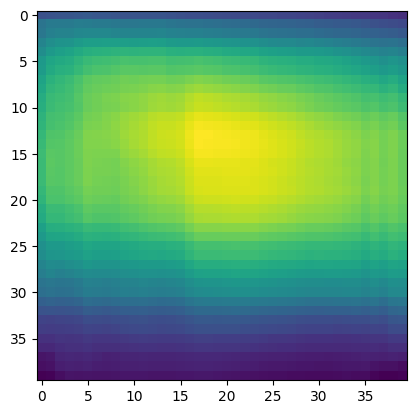

In [59]:
from matplotlib import pyplot as plt

plt.imshow(prediction_decoded[235])
plt.show()

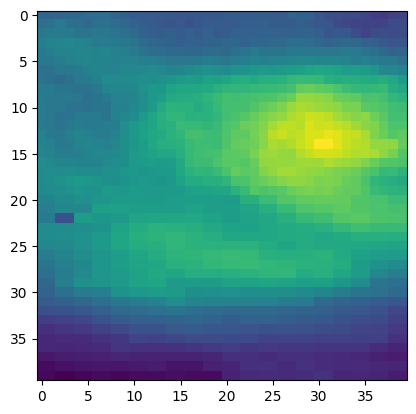

In [60]:

plt.imshow(test_X[236])
